In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [15]:
def notEmpty(s):
    return s != ''

In [16]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path,header=None)
fd.head()

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [17]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

warnings.warn("once")

D:\Anaconda\Initial\lib\site-packages\ipykernel_launcher.py:5: UserWarning: once
  """


In [18]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path,header=None)
# print (fd.shape)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):#enumerate生成一列索 引i,d为其元素

    d = map(float, filter(notEmpty, d[0].split(' ')))#filter一个函数，一个list
    
    #根据函数结果是否为真，来过滤list中的项。
    data[i] = list(d)
    
## 分割数据
x, y = np.split(data, (13,), axis=1)
print("y.shape:",y.shape)
print (x[0:5])
y = y.ravel() # 转换格式 拉直操作
print("y.shape:",y.shape)
print (y[0:5])
ly=len(y)
print("y.shape:",y.shape)
print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

y.shape: (506, 1)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
y.shape: (506,)
[24.  21.6 34.7 33.4 36.2]
y.shape: (506,)
样本数据量:506, 特征个数：13
target样本数据量:506


In [19]:
## Pipeline常用于并行调参
models = [
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', RidgeCV(alphas=np.logspace(-3,1,20)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20)))
        ])
] 

# 参数字典
parameters = {
    "poly__degree": [3,2,1],
    "poly__interaction_only": [True, False],#不产生交互项，如X1*X2  
    "poly__include_bias": [True, False],#多项式幂为零的特征作为线性模型中的截距
    "linear__fit_intercept": [True, False]
}


In [20]:
rf=PolynomialFeatures(2,interaction_only=True,include_bias=False)
a=pd.DataFrame({
    'name':[1,2,3,4,5],
    'score':[2,3,4,4,5]
})
print(a)
b=rf.fit_transform(a)
b

   name  score
0     1      2
1     2      3
2     3      4
3     4      4
4     5      5


array([[ 1.,  2.,  2.],
       [ 2.,  3.,  6.],
       [ 3.,  4., 12.],
       [ 4.,  4., 16.],
       [ 5.,  5., 25.]])

In [21]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Ridge算法:最优参数: {'linear__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': False, 'poly__interaction_only': True}
Ridge算法:R值=0.874


D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda\Initial\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

Lasso算法:最优参数: {'linear__fit_intercept': False, 'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': True}
Lasso算法:R值=0.857


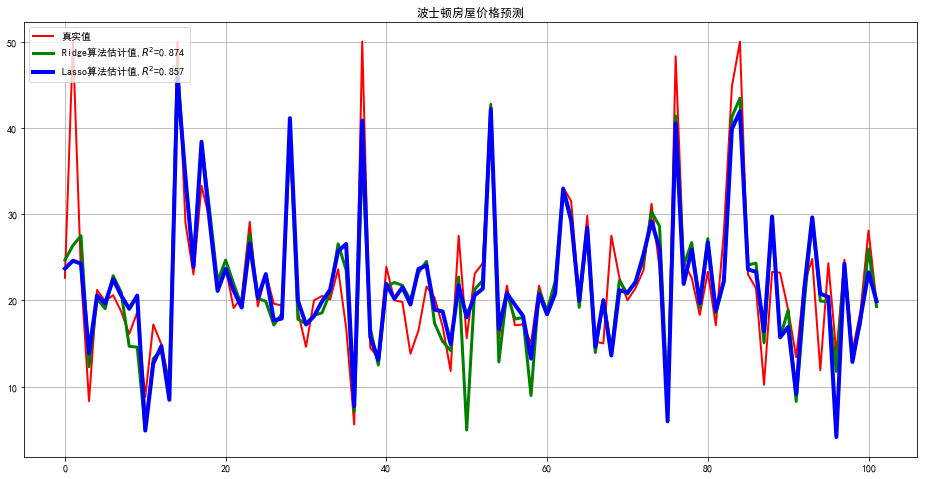

In [22]:
## Lasso和Ridge模型比较运行图表展示
titles = ['Ridge', 'Lasso']
colors = ['g-', 'b-']
plt.figure(figsize=(16,8), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'真实值')
for t in range(2):
    # 获取模型并设置参数
    model = GridSearchCV(models[t], param_grid=parameters,cv=5, n_jobs=1)#五折交叉验证
    # 模型训练-网格搜索
    model.fit(x_train, y_train)
    # 模型效果值获取（最优参数）

    print ("%s算法:最优参数:" % titles[t],model.best_params_)
    print ("%s算法:R值=%.3f" % (titles[t], model.best_score_))
    # 模型预测
    y_predict = model.predict(x_test)
    # 画图
    plt.plot(ln_x_test, y_predict, colors[t], lw = t + 3, label=u'%s算法估计值,$R^2$=%.3f' % (titles[t],model.best_score_))
# 图形显示
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"波士顿房屋价格预测")
plt.show()

In [13]:
## 模型训练 ====> 单个Lasso模型（一阶特征选择）<2参数给定1阶情况的最优参数>
model = Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=True)),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20), fit_intercept=False))
        ])
# 模型训练
model.fit(x_train, y_train)


# 模型评测
## 数据输出
print ("参数:", list(zip(names,model.get_params('linear')['linear'].coef_)))
print ("截距:", model.get_params(1)['linear'].intercept_)



参数: [('CRIM', 22.60059280920199), ('ZN', -0.935345576874145), ('INDUS', 1.0202352850146852), ('CHAS', -0.0), ('NOX', 0.5948313841546139), ('RM', -1.8002644875942362), ('AGE', 2.5861907995357285), ('DIS', -0.06495610824953962), ('RAD', -2.8017533936656513), ('TAX', 1.9343329692037554), ('PARATIO', -1.7218677875512203), ('B', -2.276233462384299), ('LSTAT', 0.7028800300551542), ('Value', -3.599196562418314)]
截距: 0.0


自己练习

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [4]:
rf = PolynomialFeatures(2,interaction_only=False,include_bias=False)
a = pd.DataFrame({'name':[1,2,3,4,5],'score':[2,3,4,4,5]})
print(a)
b = rf.fit_transform(a)
print(b)

   name  score
0     1      2
1     2      3
2     3      4
3     4      4
4     5      5
[[ 1.  2.  1.  2.  4.]
 [ 2.  3.  4.  6.  9.]
 [ 3.  4.  9. 12. 16.]
 [ 4.  4. 16. 16. 16.]
 [ 5.  5. 25. 25. 25.]]


完整练习

样本数据量为：506,特征总个数为：13
target 样本数据量为：506
LassoCV算法，最有效参数： {'Linear__fit_intercept': False, 'Poly__degree': 3, 'Poly__include_bias': True, 'Poly__interaction_only': True}
LassoCV算法，R值： 0.8567115349241563
模型: Pipeline(memory=None,
     steps=[('Ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('Linear', LassoCV(alphas=array([1.00000e-03, 1.62378e-03, 2.63665e-03, 4.28133e-03, 6.95193e-03,
       1.12884e-02, 1.83298e-02, 2.97635e-02, ...alse,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])
RidgeCV算法，最有效参数： {'Linear__fit_intercept': True, 'Poly__degree': 2, 'Poly__include_bias': False, 'Poly__interaction_only': True}
RidgeCV算法，R值： 0.8741297902358711
模型: Pipeline(memory=None,
     steps=[('Ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('Linear', Rid

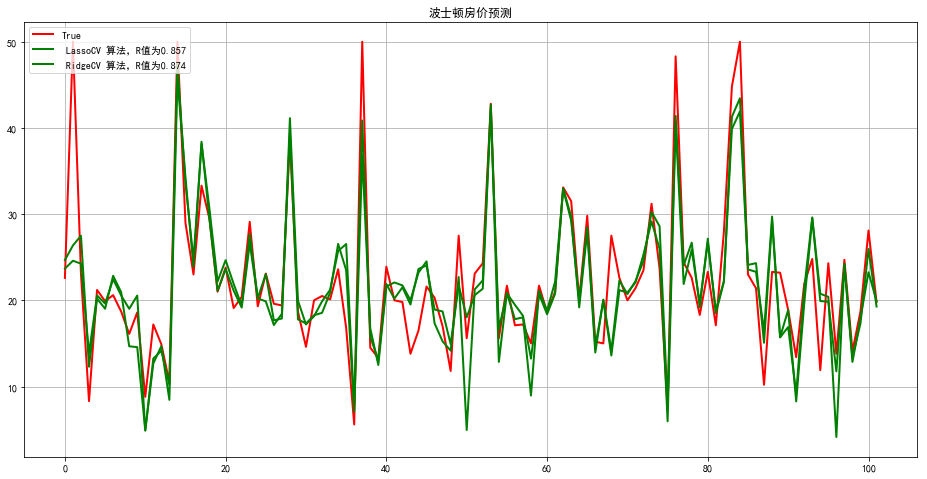

训练参数： [ 0.         -0.22279899 -0.1792346  -0.02845056  0.60975889 -1.24585643
  3.18983228 -1.17371249 -1.40979838  0.61471606 -1.33587044 -1.02637325
  1.26623188 -2.78613388  0.20151991  0.15035521  0.87319381 -0.54340969
  0.96196249 -0.02859664  0.23210396 -0.67504781  0.30510306  0.01101694
 -0.05926109  0.99497635 -0.05518748  0.17685419  0.2563235   0.07901144
 -0.0891573   0.42569447  0.56951015  0.62156273  0.22059326  0.11190414
 -0.65065851  0.11514656  0.92764889  0.68545307  0.76065452 -0.37475614
 -0.14275507  0.46058162 -0.28316478  0.34859989 -0.59130597 -0.90144614
 -0.70676302  0.3518083  -0.17260897  0.35493259  0.60927952 -0.0743831
  0.6571277  -0.53607968 -0.04848177 -0.66474918  0.42326384 -0.9504312
 -0.09836934 -0.21266435  0.01612612  0.51417216 -1.0028047   0.32113945
 -0.86900825 -1.29527895 -1.08623596 -0.15043604 -1.33417689 -0.03800494
  1.23343    -0.08515162 -0.6798064  -0.3683596  -0.89643555 -0.31479192
  0.08947063 -0.12741844 -0.71146043  0.7800378

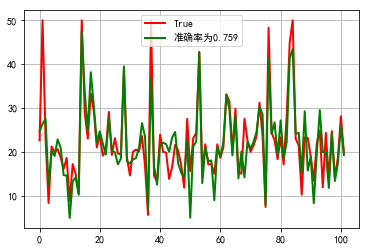

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings(action='ignore')
#warnings.filterwarnings(action='ignore',category=ConvergenceWarning) #不然会收到一堆不收敛的警告,即迭代次数太少，还没达到收敛状态

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

#1、准备数据
path = "./datas/boston_housing.data"
df = pd.read_csv(path,header=None)
#print(df.head())

def not_empty(x):
    return x != ""   #这里紧连着表示空串，而不是空格

names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PARATIO','B','LSTAT','Value']
datas = np.zeros((len(df),len(names)))     #或者datas = np.empty((len(df),len(names)))，这里只是做初始化

for i,data in enumerate(df.values):
    d_temp = map(float, filter(not_empty,data[0].split(" ")))
    datas[i] = list(d_temp)

datas = pd.DataFrame(datas)
#print(datas.head())
x = datas[datas.columns[:-1]]
y = datas[datas.columns[-1]]
print("样本数据量为：%d,特征总个数为：%d"%x.shape)
print("target 样本数据量为：%d"%y.shape[0])

#准备模型和参数
models = [
    Pipeline([
        ("Ss",StandardScaler()),
        ('Poly',PolynomialFeatures()),
        ('Linear',LassoCV(alphas=np.logspace(-3,1,20)))
    ]),
    Pipeline([
        ('Ss',StandardScaler()),
        ('Poly',PolynomialFeatures()),
        ('Linear',RidgeCV(alphas=np.logspace(-3,1,20)))
    ])
#     ,Pipeline([
#         ('ss',StandardScaler()),
#         ('poly',PolynomialFeatures()),
#         ('Linear',ElasticNetCV(alphas=np.logspace(-3,1,20),l1_ratio=[0.1,0.3,0.5,0.7,0.9]))
#     ])
]

parameters = {
    "Poly__degree":[1,2,3],
    "Poly__interaction_only":[False,True],
    "Poly__include_bias":[True,False],
    "Linear__fit_intercept":[True,False]
}

#数据分割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_line = range(len(x_test))
plt.figure(facecolor="w",figsize=(16,8))
plt.plot(x_line,y_test,'r-',lw=2,label="True")
titles = ["LassoCV","RidgeCV","ElasticNetCV"]
for i in range(2):
    model = GridSearchCV(models[i],param_grid=parameters,cv = 5) #十折交叉太费时间了。
    #模型训练，网格搜索
    model.fit(x_train,y_train)
    #模型效果值获取（得到最优参数）
    print("%s算法，最有效参数："%titles[i],model.best_params_)
    print("%s算法，R值："%titles[i],model.best_score_)
    print("模型:",model.estimator)#倒是能展示出一些参数，但还是没法看到最佳alpha
    #print("%s算法，相关参数："%titles[i],list(zip(names,model.get_params('Linear')['Linear'].coef_))) #显示linear参数不对
    #模型预测
    y_predict = model.predict(x_test)
    #画图
    plt.plot(x_line,y_predict,'g-',lw=2,label=' %s 算法，R值为%.3f'%(titles[i],model.best_score_))
plt.legend(loc="upper left")
plt.grid(True)
plt.title("波士顿房价预测")
plt.show()

#后面还需要进行最好模型测试一遍，使用最优参数
#运行发现
'''
LassoCV算法，最有效参数： {'linear__fit_intercept': False, 'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': True}
LassoCV算法，R值： 0.8567115349241563
RidgeCV算法，最有效参数： {'linear__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True}
RidgeCV算法，R值： 0.8741297902358947
'''
best_model = Pipeline([
    ('Ss',StandardScaler()),
    ('Poly',PolynomialFeatures(interaction_only=True,include_bias=True)),
    ('Linear',RidgeCV(alphas=np.logspace(-3,1,20),fit_intercept=True))
])

best_model.set_params(Poly__degree=2)

#模型训练
best_model.fit(x_train,y_train)
print("训练参数：",best_model.get_params('Linear')['Linear'].coef_)
print("截距：",best_model.get_params('Linear')['Linear'].intercept_)
plt.figure()
plt.plot(x_line,y_test,'r-',lw=2,label="True")
y_predict = best_model.predict(x_test)

s = best_model.score(x_test,y_test)
plt.plot(x_line,y_predict,'g-',lw=2,label='准确率为%.3f'%s)
plt.legend()
plt.grid(True)
plt.show()

